# All material ©2019, Alex Siegman

---

## In your terminal: 


1. \> {navigate to desired directory}
2. \> mkdir app
3. \> cd app
4. \> touch helloAdvanced.py

## helloAdvanced.py

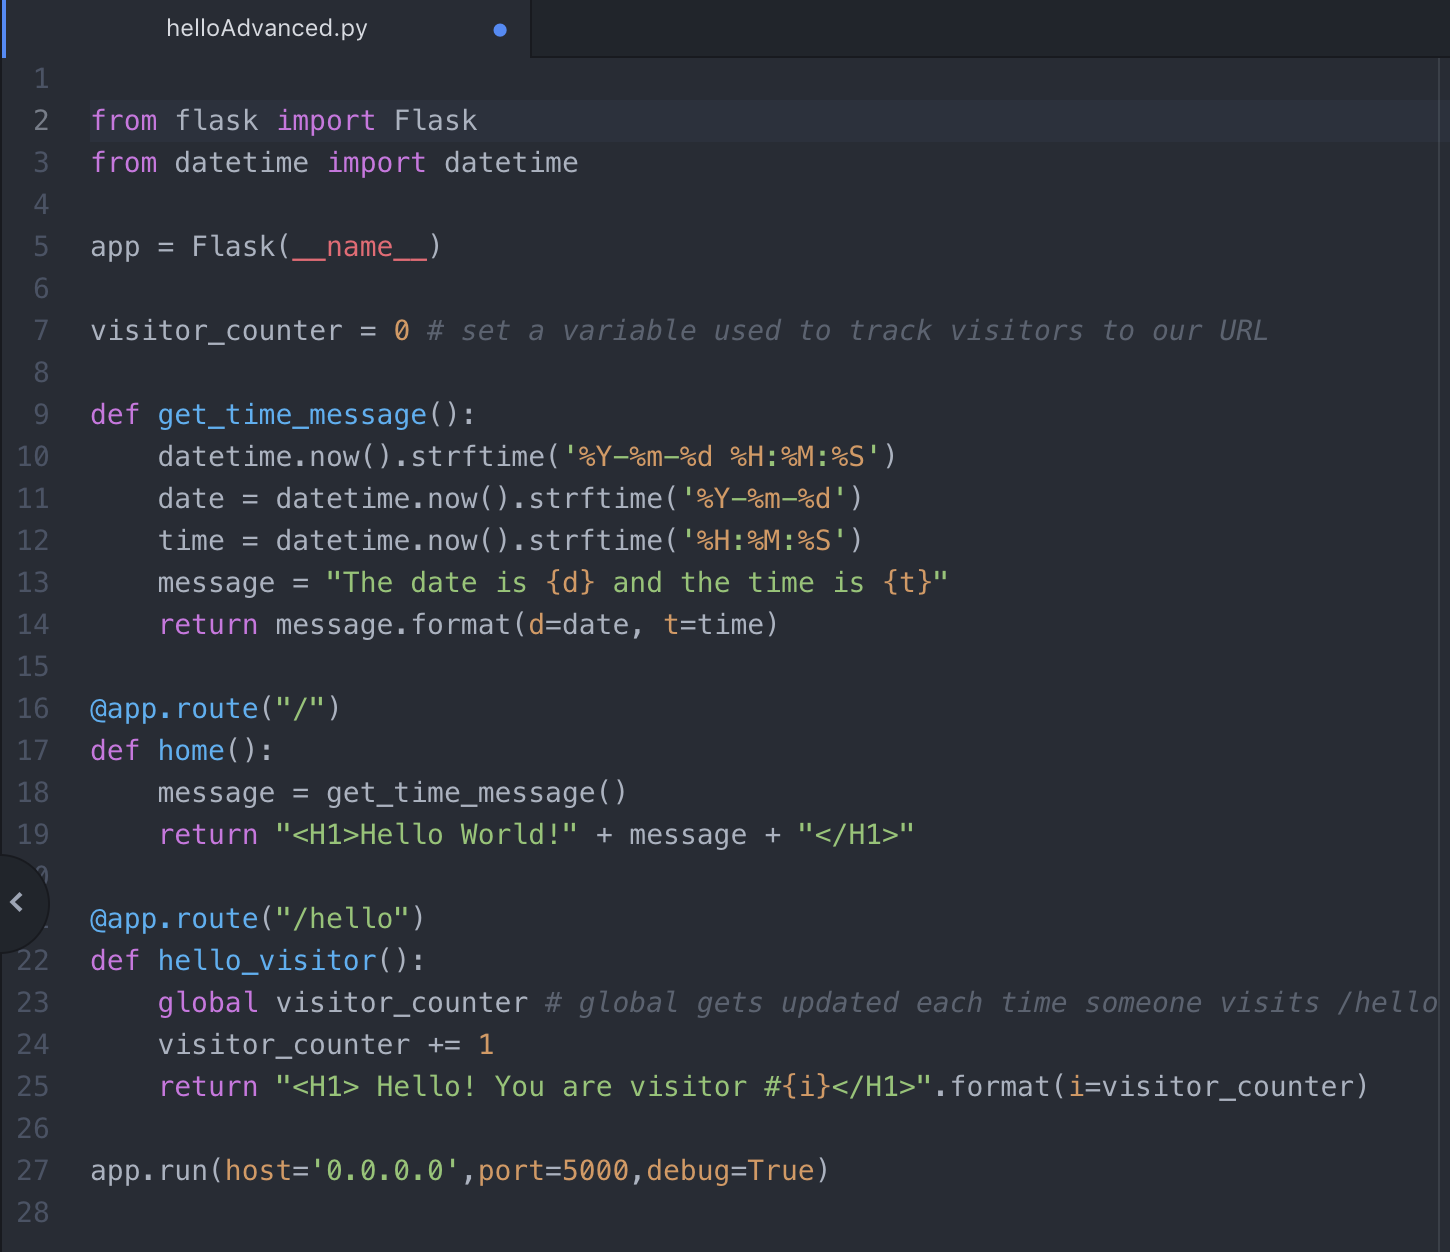

## In your terminal: 


1. \> {navigate to desired directory}
2. \> mkdir templates
3. \> cd templates
4. \> touch index.html

## index.html

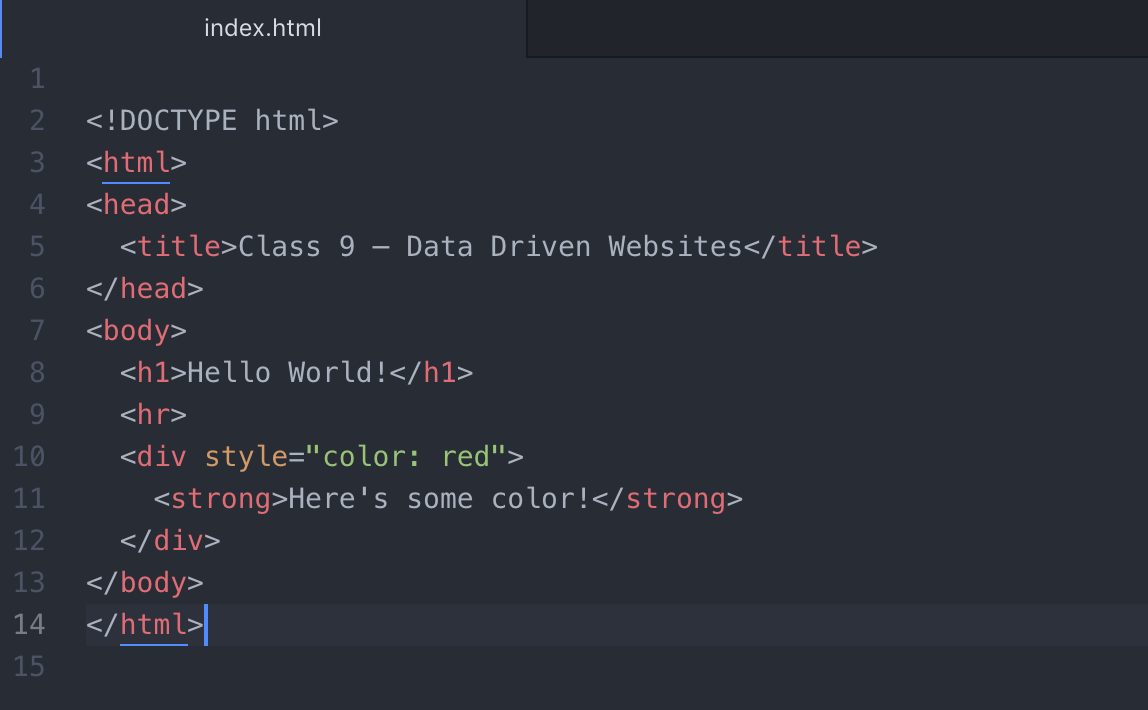

## In helloAdvanced.py, we are going to add / change the following:

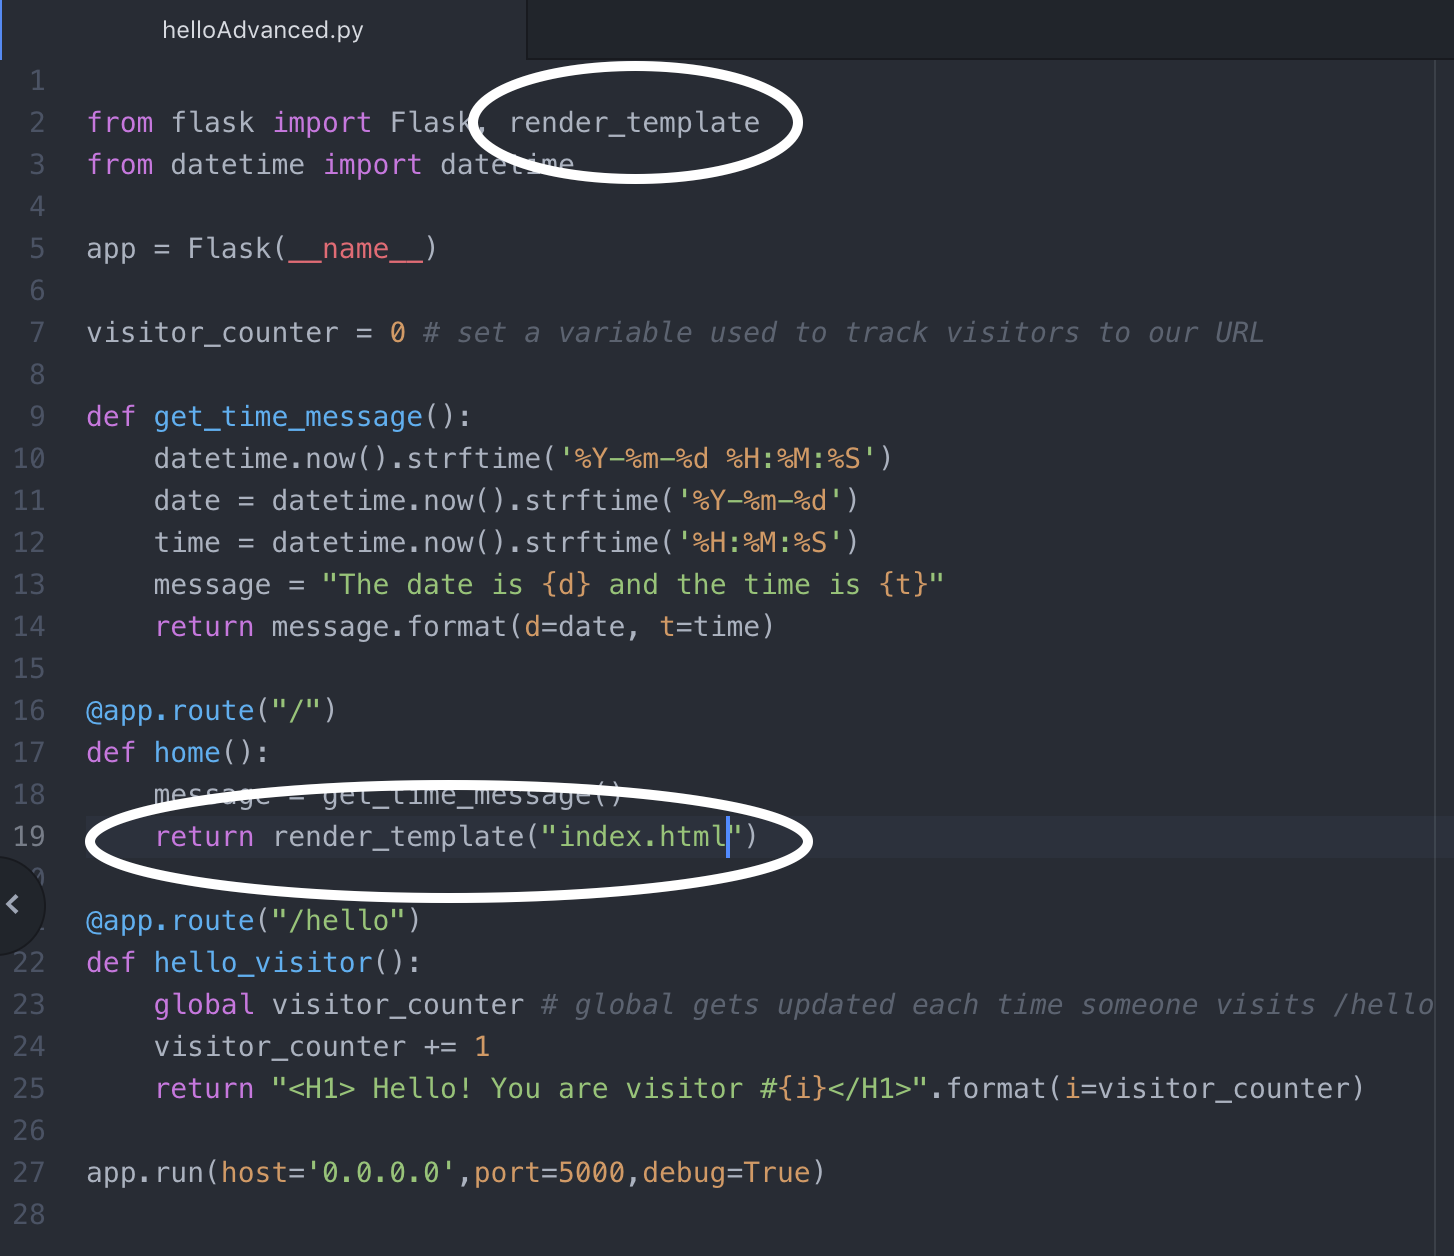

In [1]:
!pip install Jinja2

## In index.html we are going to add / change the following:

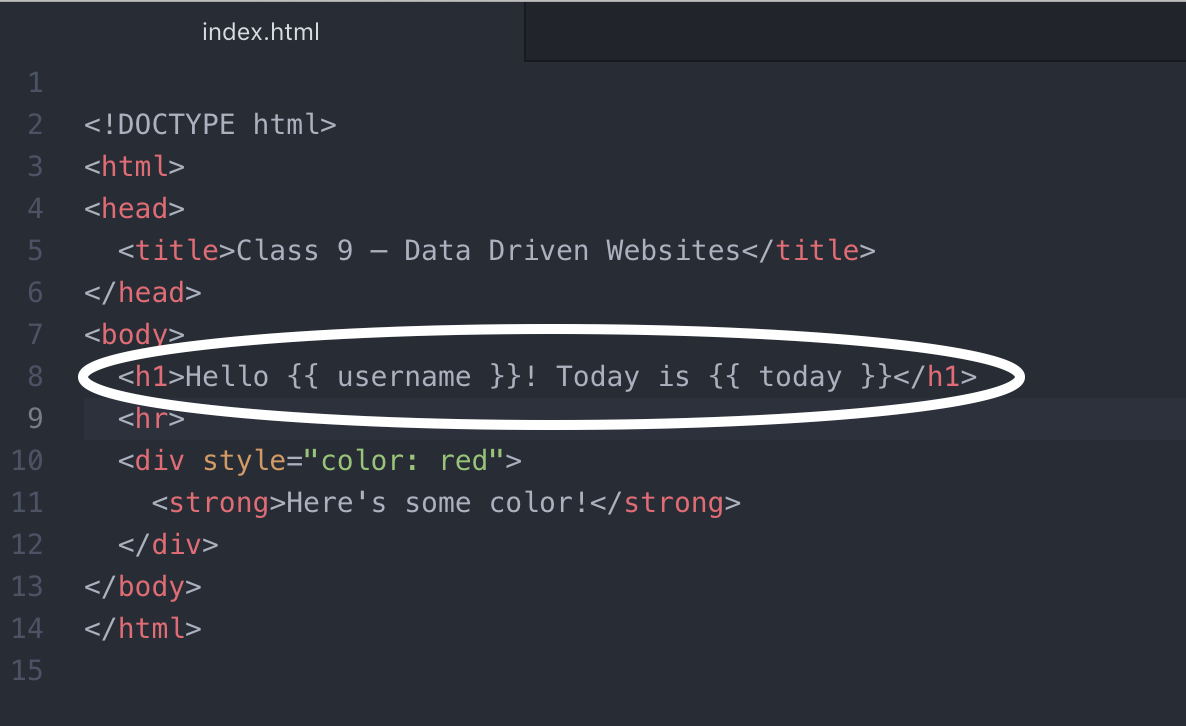

## In helloAdvanced.py we are going to add/change the following: 

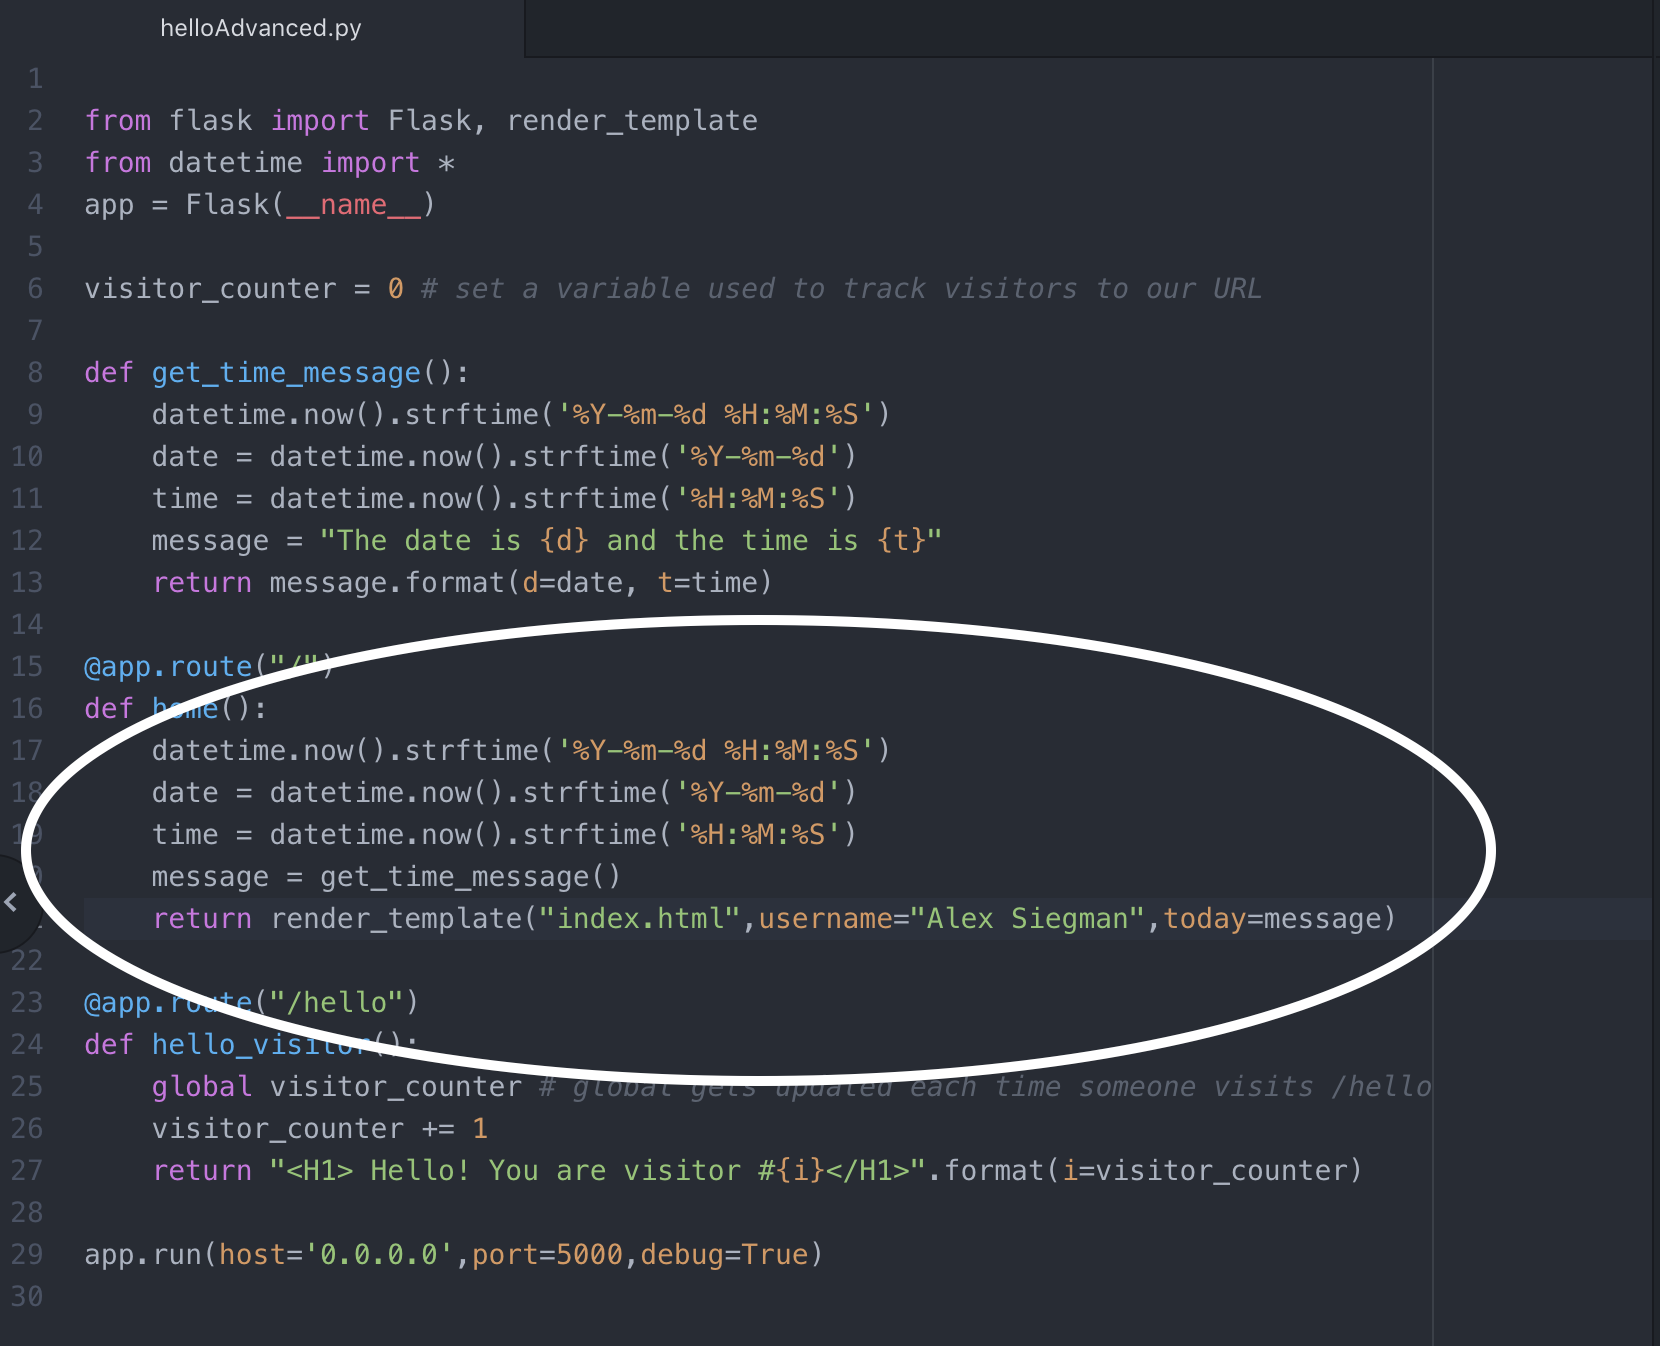